In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image

In [2]:
def display_image(image):
    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.imshow(image)
    plt.show()
    #clear_output(wait=True)

In [6]:
def lipstick(image, alpha):
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_face_mesh = mp.solutions.face_mesh
    mp_hands = mp.solutions.hands
    
    drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
    
    with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
        image_clear = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        image_clear.flags.writeable = False
        results = face_mesh.process(image_clear)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_face_landmarks:
            lipsUpperOuter = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291]
            lipsLowerOuter = [146, 91, 181, 84, 17, 314, 405, 321, 375, 291]
            lipsUpperInner = [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308]
            lipsLowerInner = [78, 95, 88, 178, 87, 14, 317, 402, 318, 324, 308]
            

            lips_upper = lipsUpperOuter + lipsUpperInner[::-1]
            contours_upper = []

            for i in lips_upper:
                x =  int(results.multi_face_landmarks[0].landmark[i].x * image.shape[1])
                y =  int(results.multi_face_landmarks[0].landmark[i].y * image.shape[0])

                contours_upper.append([x, y])

            contours_upper = np.array(contours_upper)
            
            lips_lower = lipsLowerOuter + lipsLowerInner[::-1]
            contours_lower = []

            for i in lips_lower:
                x =  int(results.multi_face_landmarks[0].landmark[i].x * image.shape[1])
                y =  int(results.multi_face_landmarks[0].landmark[i].y * image.shape[0])

                contours_lower.append([x, y])

            contours_lower = np.array(contours_lower)

            with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:

                results = hands.process(image_clear)

                if results.multi_hand_landmarks:
                    x = results.multi_hand_landmarks[0].landmark[8].x
                    y = results.multi_hand_landmarks[0].landmark[8].y
                    x = int(np.floor(image.shape[1]*x))
                    y = int(np.floor(image.shape[0]*y))

                    color = (image_clear[y, x, 2], image_clear[y, x, 1], image_clear[y, x, 0])
                    color = tuple(map(int, color))
                    
                    overlay = image.copy()
                    
                    cv2.fillPoly(overlay, pts =[contours_upper], color=color)
                    cv2.fillPoly(overlay, pts =[contours_lower], color=color)
                    
                    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image) 
                    
                    
                    

#                     wind = cv2.cvtColor(image_clear, cv2.COLOR_BGR2GRAY)
#                     sobelx = cv2.Sobel(wind,cv2.CV_64F,1,0,ksize = 3)
#                     sobely = cv2.Sobel(wind,cv2.CV_64F,0,1,ksize = 3)
#                     grad = np.sqrt(sobelx**2 + sobely**2)
#                     grad = np.uint8(grad)
#                     grad = (grad - np.min(grad)) / (np.max(grad) - np.min(grad))
#                     grad_final = grad.copy()
#                     cv2.fillPoly(grad, pts =[contours_upper], color = [0])
#                     cv2.fillPoly(grad, pts =[contours_lower], color = [0])
#                     grad_final -= grad
#                     grad_final *= 255
#                     grad_final = 1 - grad_final
#                     grad_final = np.expand_dims(grad_final, axis = -1)
                    
#                     display_image(overlay)
#                     overlay = np.concatenate((overlay, grad_final), axis = 2)
#                     overlay = Image.fromarray(overlay, 'RGBA')
#                     image = Image.fromarray(image)
#                     image.paste(overlay, (0,0), grad_final)
                    
                    image = np.array(image)
                    


    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

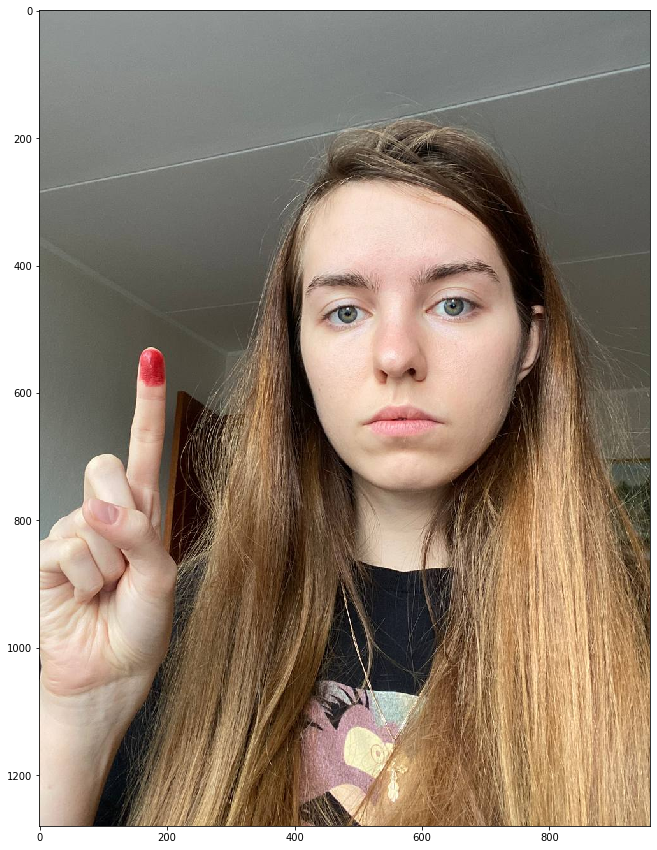

In [9]:
image = cv2.imread("canada.jpg")
display_image(image)

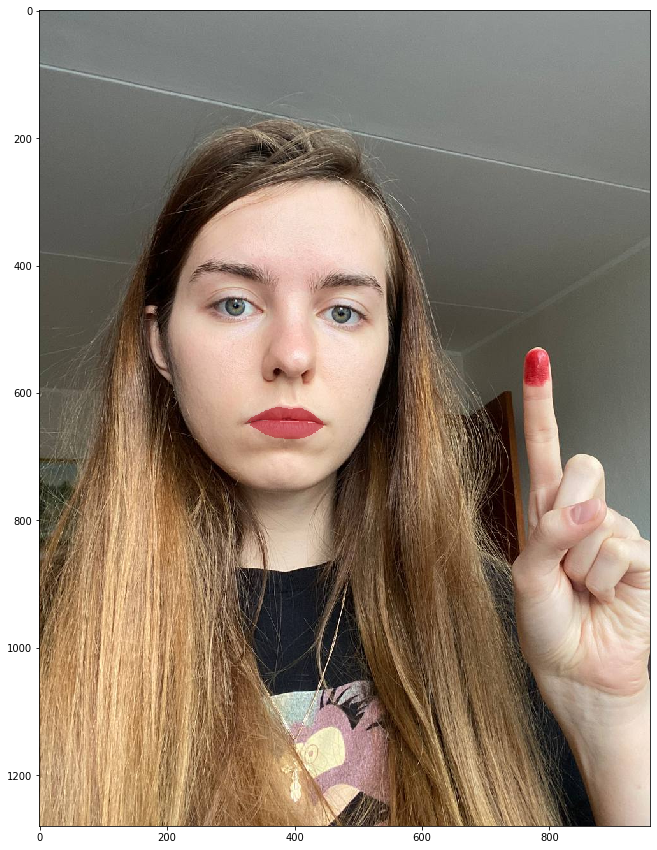

In [10]:
alphas = [0.5]
for alpha in alphas:
    new_image = lipstick(image, alpha)
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    display_image(new_image)
    